# Results Notebook Deep Q-Learning Project (MHBF)

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def sliding_mean(data, size_window):
    window = np.ones(size_window) / size_window
    return np.convolve(data, window)

def read_files_same_params(folder):
    suffixes = ['baseline', 'rb', 'tn', 'lf', 'prb']
    results = []
    for suf in suffixes:
        result = torch.load(f'{folder}/results_{suf}.pth')
        results.append(result)
    return results[0], results[1], results[2], results[3], results[4]
# params, weights, step_game, rewards_test, rewards_train, loss
SLIDING_WINDOW_L = 20
SLIDING_WINDOW_G = 200

# Baseline

In [12]:
folder_linear = 'results_linear/params_baseline'
folder_grid = 'results_grid/params_baseline' 

baseline_results_linear, rb_results_linear, \
tn_results_linear, lf_results_linear, prb_results_linear \
= read_files_same_params(folder_linear)

baseline_results_grid, rb_results_grid, \
tn_results_grid, lf_results_grid, prb_results_grid \
= read_files_same_params(folder_grid)

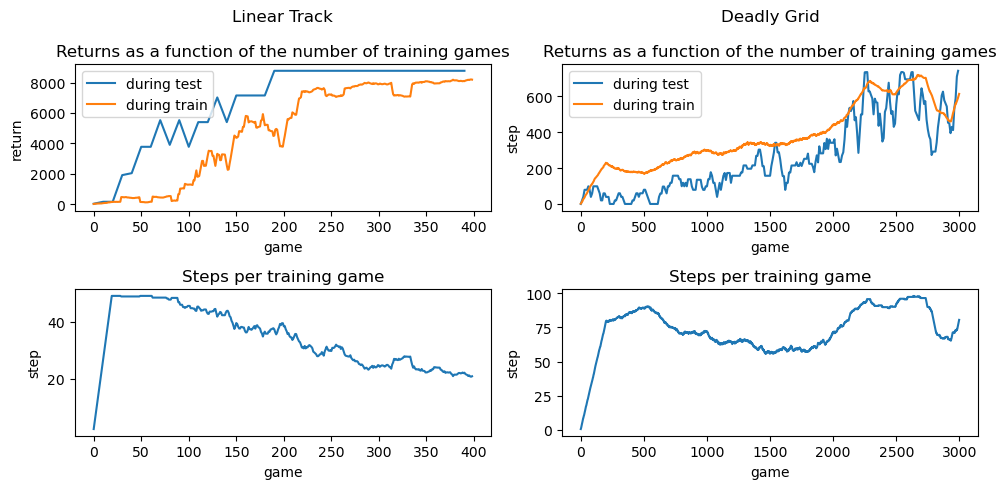

In [338]:
fig, axs = plt.subplots(2, 2, figsize = (10, 5))

#PLOTTING REWARDS TRAININING
axs[0][0].plot([10 * i for i in range(int(baseline_results_linear["params"]['n_game']/10))],
               sliding_mean(baseline_results_linear["rewards_test"], 5)[:-4],
               label = "during test")

axs[0][0].plot(sliding_mean(baseline_results_linear["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = "during train")
axs[0][0].legend(loc = 'upper left')
axs[0][0].set_title("Linear Track\n\nReturns as a function of the number of training games")
axs[0][0].set_xlabel("game")
axs[0][0].set_ylabel("return")

#PLOTTING REWARDS TESTING
axs[0][1].plot([10 * i for i in range(int(baseline_results_grid["params"]['n_game']/10))],
         sliding_mean(baseline_results_grid["rewards_test"], 5)[:-4],
         label = "during test")
axs[0][1].plot(sliding_mean(baseline_results_grid["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = "during train")

axs[0][1].legend(loc = 'upper left')
axs[0][1].set_title("Deadly Grid\n\nReturns as a function of the number of training games")
axs[0][1].set_xlabel("game")
axs[0][1].set_ylabel("step")

#PLOTTING STEP PER GAME
axs[1][0].plot(sliding_mean(baseline_results_linear["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L])
axs[1][0].set_title("Steps per training game")
axs[1][0].set_xlabel("game")
axs[1][0].set_ylabel("step")

#PLOTTING STEP PER GAME
axs[1][1].plot(sliding_mean(baseline_results_grid["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G])
axs[1][1].set_title("Steps per training game")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("step")

plt.tight_layout()
plt.show()
    

# Loss Functions

In [154]:
folder_linear = 'results_linear/params_baseline'
folder_grid = 'results_grid/params_baseline' 

baseline_results_linear, rb_results_linear, \
tn_results_linear, lf_results_linear, prb_results_linear \
= read_files_same_params(folder_linear)

baseline_results_grid, rb_results_grid, \
tn_results_grid, lf_results_grid, prb_results_grid \
= read_files_same_params(folder_grid)
# params, weights, step_game, rewards_test, rewards_train, loss
SLIDING_WINDOW = 20


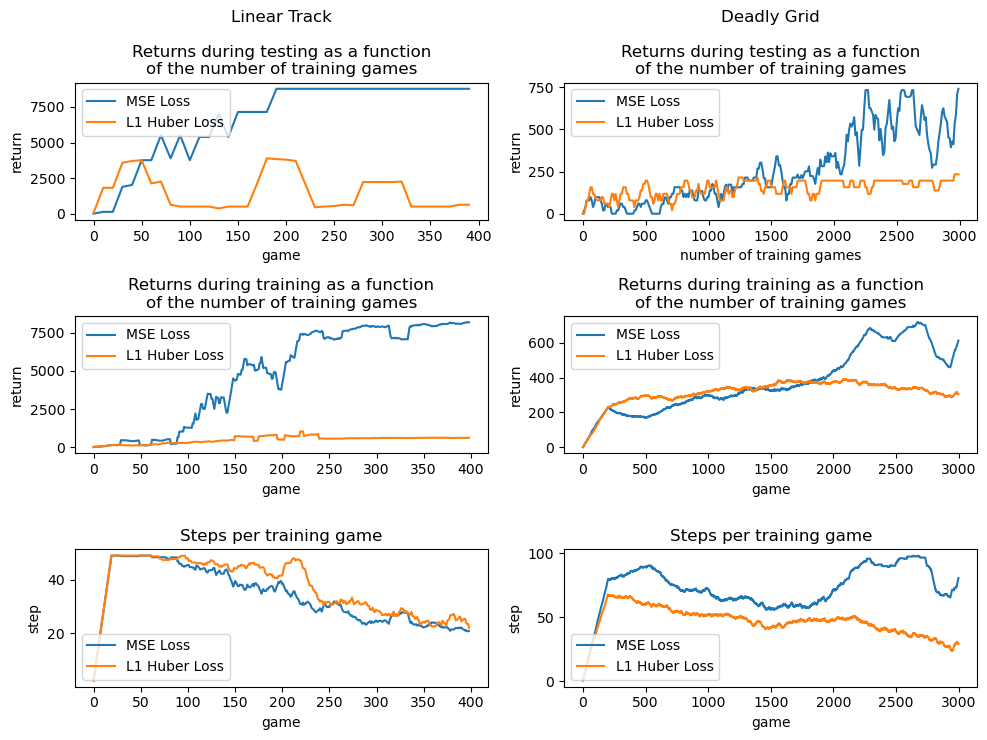

In [344]:
fig, axs = plt.subplots(3, 2, figsize = (10, 7.5))

# LINEAR
#PLOTTING REWARDS TESTING
axs[0][0].plot([10 * i for i in range(int(baseline_results_linear["params"]['n_game']/10))],
               sliding_mean(baseline_results_linear["rewards_test"], 5)[:-4],
               label = "MSE Loss")

axs[0][0].plot([10 * i for i in range(int(lf_results_linear["params"]['n_game']/10))],
               sliding_mean(lf_results_linear["rewards_test"], 5)[:-4],
               label = "L1 Huber Loss")
axs[0][0].legend(loc = 'upper left')
axs[0][0].set_title("Linear Track\n\nReturns during testing as a function\nof the number of training games")
axs[0][0].set_xlabel("game")
axs[0][0].set_ylabel("return")
#PLOTTING REWARDS TRAININING
axs[1][0].plot(sliding_mean(baseline_results_linear["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = "MSE Loss")
axs[1][0].plot(sliding_mean(lf_results_linear["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = "L1 Huber Loss")
axs[1][0].legend(loc = 'upper left')
axs[1][0].set_title("Returns during training as a function\nof the number of training games")
axs[1][0].set_xlabel("game")
axs[1][0].set_ylabel("return")

#PLOTTING STEP PER GAME
axs[2][0].plot(sliding_mean(baseline_results_linear["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], label = "MSE Loss")
axs[2][0].plot(sliding_mean(lf_results_linear["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],label = "L1 Huber Loss")
axs[2][0].set_title("Steps per training game")
axs[2][0].legend(loc = 'lower left')
axs[2][0].set_xlabel("game")
axs[2][0].set_ylabel("step")

# GRID
#PLOTTING REWARDS TESTING
axs[0][1].plot([10 * i for i in range(int(baseline_results_grid["params"]['n_game']/10))],
               sliding_mean(baseline_results_grid["rewards_test"], 5)[:-4],
               label = "MSE Loss")

axs[0][1].plot([10 * i for i in range(int(lf_results_grid["params"]['n_game']/10))],
               sliding_mean(lf_results_grid["rewards_test"], 5)[:-4],
               label = "L1 Huber Loss")
axs[0][1].legend(loc = 'upper left')
axs[0][1].set_title("Deadly Grid\n\nReturns during testing as a function\nof the number of training games")
axs[0][1].set_xlabel("number of training games")
axs[0][1].set_ylabel("return")
#PLOTTING REWARDS TRAININING
axs[1][1].plot(sliding_mean(baseline_results_grid["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = "MSE Loss")
axs[1][1].plot(sliding_mean(lf_results_grid["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = "L1 Huber Loss")
axs[1][1].legend(loc = 'upper left')
axs[1][1].set_title("Returns during training as a function\nof the number of training games")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("return")
#PLOTTING STEP PER GAME
axs[2][1].plot(sliding_mean(baseline_results_grid["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G], label = "MSE Loss")
axs[2][1].plot(sliding_mean(lf_results_grid["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],label = "L1 Huber Loss")
axs[2][1].legend(loc = 'lower left')
axs[2][1].set_title("Steps per training game")
axs[2][1].set_xlabel("game")
axs[2][1].set_ylabel("step")
plt.tight_layout()
plt.show()

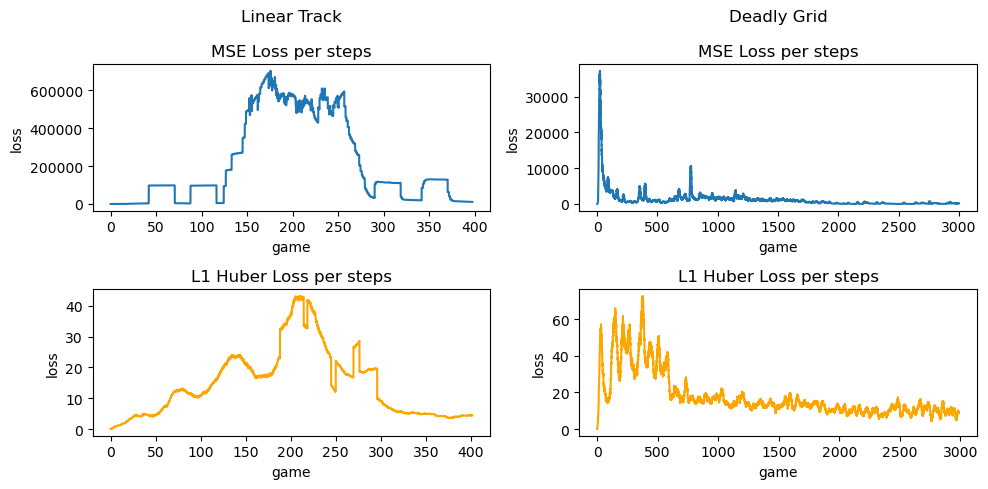

In [328]:
fig, axs = plt.subplots(2, 2, figsize = (10, 5))

#PLOTTING Loss PER GAME
t = [i/35 for i in range(len(baseline_results_linear["loss"])-1)]
axs[0][0].plot(t, sliding_mean(baseline_results_linear["loss"], 50*SLIDING_WINDOW_L)[:-50*SLIDING_WINDOW_L], label = "MSE Loss")
t = [i/38 for i in range(len(lf_results_linear["loss"])-1)]
axs[1][0].plot(t, sliding_mean(lf_results_linear["loss"], 50*SLIDING_WINDOW_L)[:-50*SLIDING_WINDOW_L],label = "L1 Huber Loss", c = "orange")
axs[0][0].set_title("Linear Track\n\nMSE Loss per steps")
axs[1][0].set_title("L1 Huber Loss per steps")
axs[0][0].set_xlabel("game")
axs[0][0].set_ylabel("loss")
axs[1][0].set_xlabel("game")
axs[1][0].set_ylabel("loss")
#PLOTTING Loss PER GAME
t = [i/76 for i in range(len(baseline_results_grid["loss"])-1)]
axs[0][1].plot(t, sliding_mean(baseline_results_grid["loss"], 50*SLIDING_WINDOW_L)[:-50*SLIDING_WINDOW_L], label = "MSE Loss")
t = [i/48 for i in range(len(lf_results_grid["loss"])-1)]
axs[1][1].plot(t, sliding_mean(lf_results_grid["loss"], 50*SLIDING_WINDOW_L)[:-50*SLIDING_WINDOW_L],label = "L1 Huber Loss", color = "orange")
axs[0][1].set_title("Deadly Grid\n\nMSE Loss per steps")
axs[1][1].set_title("L1 Huber Loss per steps")
axs[0][1].set_xlabel("game")
axs[0][1].set_ylabel("loss")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("loss")
plt.tight_layout()
plt.show()


# Discount

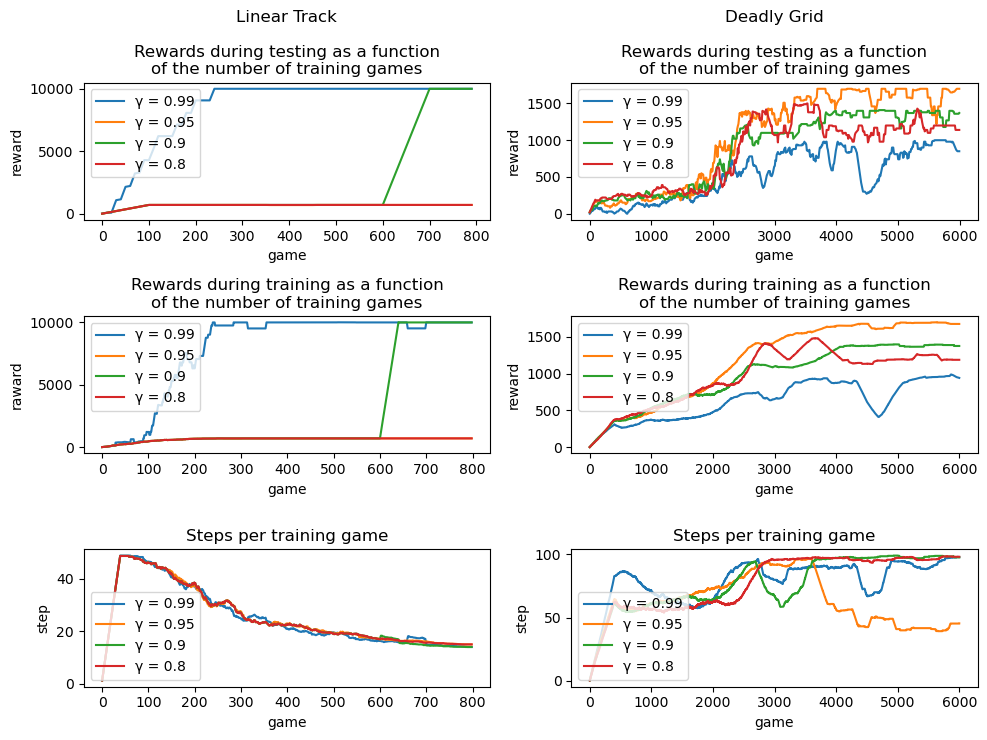

In [418]:
folder_linear = 'results_linear/discount_results'
folder_grid = 'results_grid/discount_results' 

fig, axs = plt.subplots(3, 2, figsize = (10, 7.5))

discounts = [0.99, 0.95, 0.9, 0.8]
for d in discounts:
    result = torch.load(f'{folder_linear}/results_{d}.pth')

    axs[0][0].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = f"γ = {d}")
    axs[1][0].plot(sliding_mean(result["rewards_train"], 2*SLIDING_WINDOW_L)[:-2*SLIDING_WINDOW_L],
               label = f"γ = {d}")
    axs[2][0].plot(sliding_mean(result["step_game"], 2*SLIDING_WINDOW_L)[:-2*SLIDING_WINDOW_L], label = f"γ = {d}")

for d in discounts:
    result = torch.load(f'{folder_grid}/results_{d}.pth')

    axs[0][1].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = f"γ = {d}")
    axs[1][1].plot(sliding_mean(result["rewards_train"], 2*SLIDING_WINDOW_G)[:-2*SLIDING_WINDOW_G],
               label = f"γ = {d}")
    axs[2][1].plot(sliding_mean(result["step_game"], 2*SLIDING_WINDOW_G)[:-2*SLIDING_WINDOW_G], label = f"γ = {d}")

axs[0][0].legend(loc = 'upper left')
axs[0][0].set_title("Linear Track\n\nRewards during testing as a function\nof the number of training games")
axs[0][0].set_xlabel("game")
axs[0][0].set_ylabel("reward")
axs[1][0].legend(loc = 'upper left')
axs[1][0].set_title("Rewards during training as a function\nof the number of training games")
axs[1][0].set_xlabel("game")
axs[1][0].set_ylabel("raward")
axs[2][0].set_title("Steps per training game")
axs[2][0].legend(loc = 'lower left')
axs[2][0].set_xlabel("game")
axs[2][0].set_ylabel("step")
axs[0][1].legend(loc = 'upper left')
axs[0][1].set_title("Deadly Grid\n\nRewards during testing as a function\nof the number of training games")
axs[0][1].set_xlabel("game")
axs[0][1].set_ylabel("reward")
axs[1][1].legend(loc = 'upper left')
axs[1][1].set_title("Rewards during training as a function\nof the number of training games")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("reward")
axs[2][1].legend(loc = 'lower left')
axs[2][1].set_title("Steps per training game")
axs[2][1].set_xlabel("game")
axs[2][1].set_ylabel("step")
plt.tight_layout()
plt.show()

# Neural Network

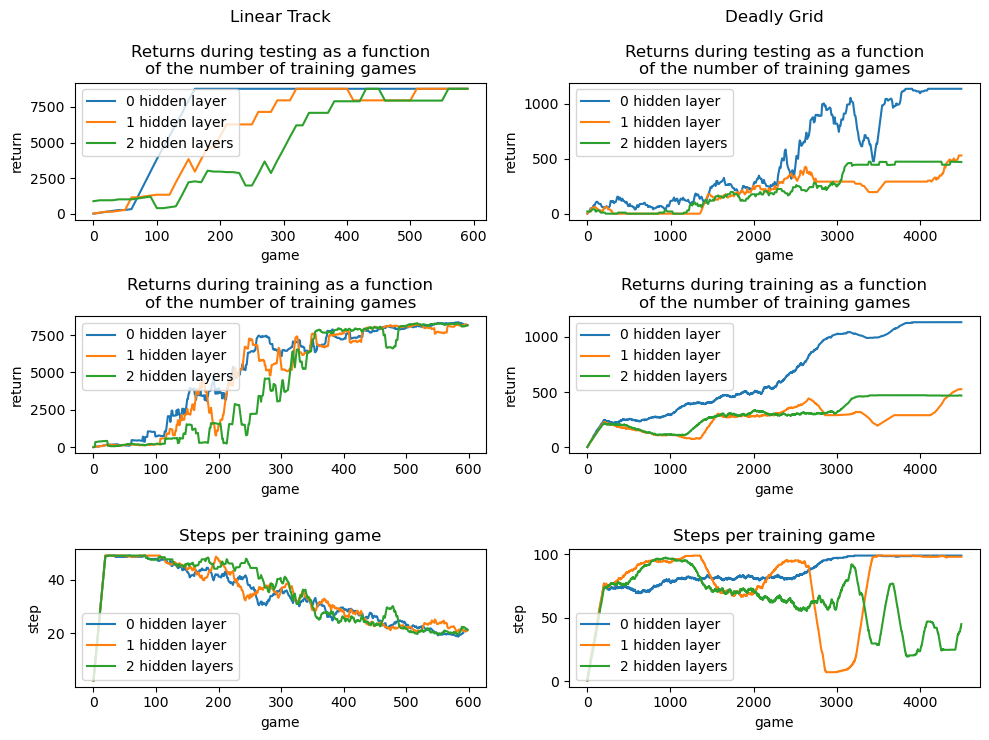

In [35]:
folder_linear = 'results_linear/nn_results'
folder_grid = 'results_grid/nn_results' 

fig, axs = plt.subplots(3, 2, figsize = (10, 7.5))

hl = [0, 1, 2]
for g in hl:
    if g<=1:
        l = f"{g} hidden layer"
    else:
        l = f"{g} hidden layers"
    result = torch.load(f'{folder_linear}/results_{g}_128.pth')

    axs[0][0].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = l)
    axs[1][0].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = l)
    axs[2][0].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], 
                   label = l)
for g in hl:
    if g<=1:
        l = f"{g} hidden layer"
    else:
        l = f"{g} hidden layers"
    result = torch.load(f'{folder_grid}/results_{g}_128.pth')

    axs[0][1].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = l)
    axs[1][1].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = l)
    axs[2][1].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G], 
                   label = l)

axs[0][0].legend(loc = 'upper left')
axs[0][0].set_title("Linear Track\n\nReturns during testing as a function\nof the number of training games")
axs[0][0].set_xlabel("game")
axs[0][0].set_ylabel("return")
axs[1][0].legend(loc = 'upper left')
axs[1][0].set_title("Returns during training as a function\nof the number of training games")
axs[1][0].set_xlabel("game")
axs[1][0].set_ylabel("return")
axs[2][0].set_title("Steps per training game")
axs[2][0].legend(loc = 'lower left')
axs[2][0].set_xlabel("game")
axs[2][0].set_ylabel("step")
axs[0][1].legend(loc = 'upper left')
axs[0][1].set_title("Deadly Grid\n\nReturns during testing as a function\nof the number of training games")
axs[0][1].set_xlabel("game")
axs[0][1].set_ylabel("return")
axs[1][1].legend(loc = 'upper left')
axs[1][1].set_title("Returns during training as a function\nof the number of training games")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("return")
axs[2][1].legend(loc = 'lower left')
axs[2][1].set_title("Steps per training game")
axs[2][1].set_xlabel("game")
axs[2][1].set_ylabel("step")
plt.tight_layout()
plt.show()

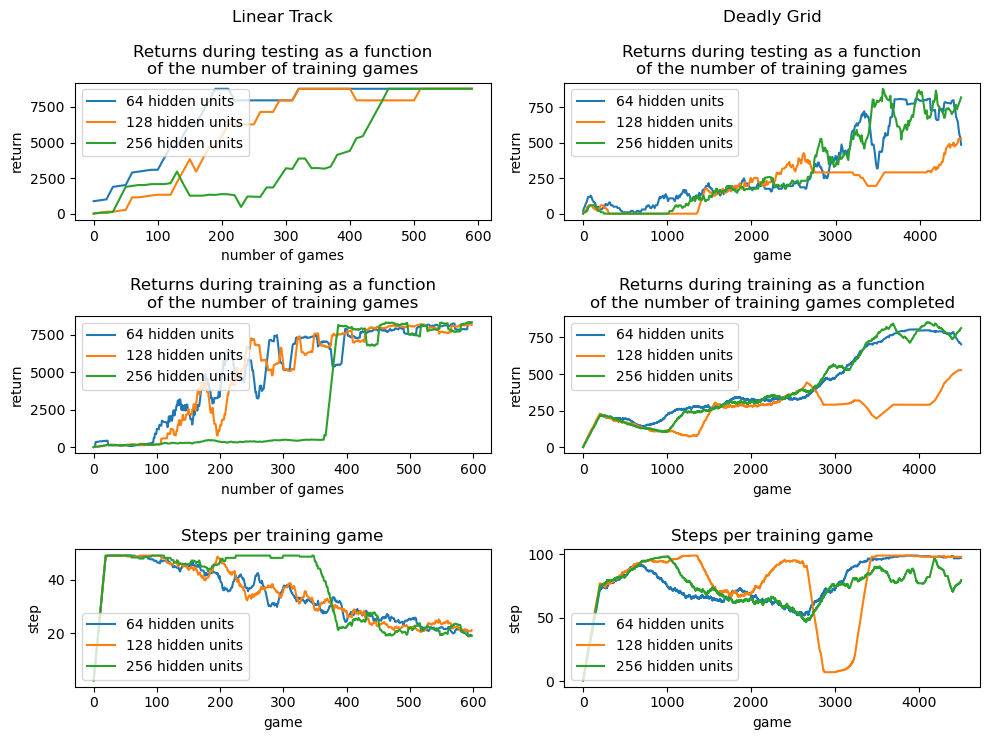

In [36]:
folder_linear = 'results_linear/nn_results'
folder_grid = 'results_grid/nn_results' 

fig, axs = plt.subplots(3, 2, figsize = (10, 7.5))

gamma = [64, 128, 256]
for g in gamma:
    result = torch.load(f'{folder_linear}/results_1_{g}.pth')

    axs[0][0].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = f"{g} hidden units")
    axs[1][0].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = f"{g} hidden units")
    axs[2][0].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], 
                   label = f"{g} hidden units")
for g in gamma:
    result = torch.load(f'{folder_grid}/results_1_{g}.pth')

    axs[0][1].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = f"{g} hidden units")
    axs[1][1].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = f"{g} hidden units")
    axs[2][1].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G], 
                   label = f"{g} hidden units")

axs[0][0].legend(loc = 'upper left')
axs[0][0].set_title("Linear Track\n\nReturns during testing as a function\nof the number of training games")
axs[0][0].set_xlabel("number of games")
axs[0][0].set_ylabel("return")
axs[1][0].legend(loc = 'upper left')
axs[1][0].set_title("Returns during training as a function\nof the number of training games")
axs[1][0].set_xlabel("number of games")
axs[1][0].set_ylabel("return")
axs[2][0].set_title("Steps per training game")
axs[2][0].legend(loc = 'lower left')
axs[2][0].set_xlabel("game")
axs[2][0].set_ylabel("step")
axs[0][1].legend(loc = 'upper left')
axs[0][1].set_title("Deadly Grid\n\nReturns during testing as a function\nof the number of training games")
axs[0][1].set_xlabel("game")
axs[0][1].set_ylabel("return")
axs[1][1].legend(loc = 'upper left')
axs[1][1].set_title("Returns during training as a function\nof the number of training games completed")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("return")
axs[2][1].legend(loc = 'lower left')
axs[2][1].set_title("Steps per training game")
axs[2][1].set_xlabel("game")
axs[2][1].set_ylabel("step")
plt.tight_layout()
plt.show()

# Target Network

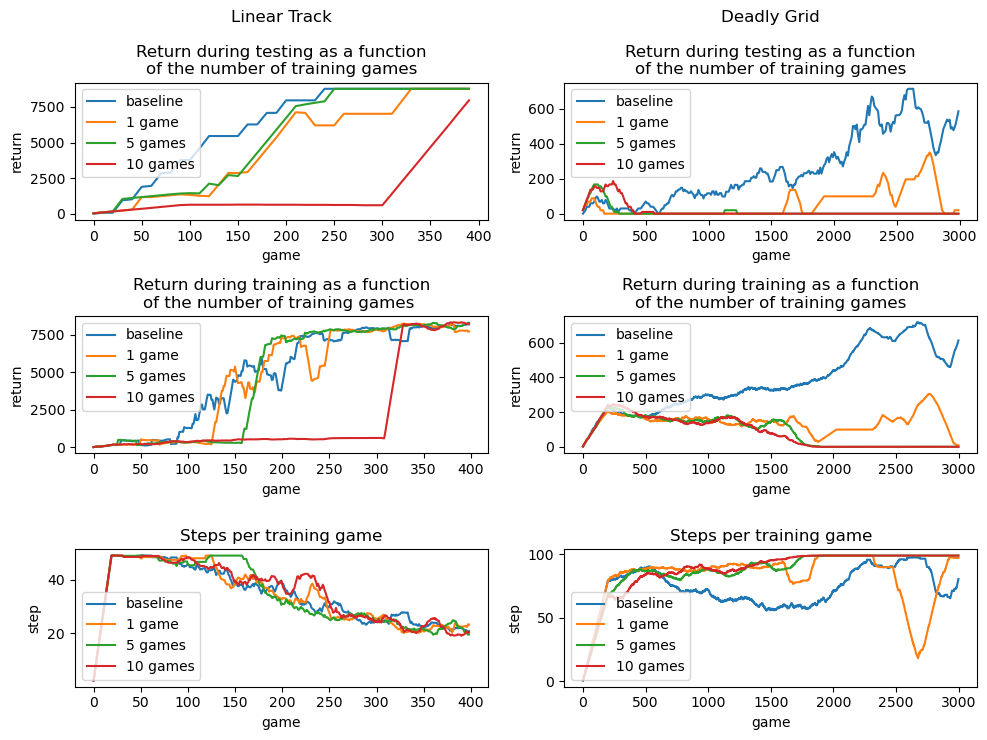

In [362]:
folder_linear = 'results_linear/target_results'
folder_grid = 'results_grid/target_results' 

fig, axs = plt.subplots(3, 2, figsize = (10, 7.5))

#baseline_results_linear
axs[0][0].plot([10 * i for i in range(int(baseline_results_linear["params"]['n_game']/10))],
               sliding_mean(baseline_results_linear["rewards_test"], 10)[:-9],
               label = f"baseline")
axs[1][0].plot(sliding_mean(baseline_results_linear["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = f"baseline")
axs[2][0].plot(sliding_mean(baseline_results_linear["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], 
               label = f"baseline")

axs[0][1].plot([10 * i for i in range(int(baseline_results_grid["params"]['n_game']/10))],
               sliding_mean(baseline_results_grid["rewards_test"], 10)[:-9],
               label = f"baseline")
axs[1][1].plot(sliding_mean(baseline_results_grid["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = f"baseline")
axs[2][1].plot(sliding_mean(baseline_results_grid["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G], 
               label = f"baseline")
#baseline_results_grid

freq = [1, 5, 10]
for f in freq:
    result = torch.load(f'{folder_linear}/results_{f}.pth')
    if f == 1:
        l = f"{f} game"
    else:
        l = f"{f} games"
    axs[0][0].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = l)
    axs[1][0].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = l)
    axs[2][0].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], 
               label = l)
for f in freq:
    result = torch.load(f'{folder_grid}/results_{f}.pth')
    if f == 1:
        l = f"{f} game"
    else:
        l = f"{f} games"
    axs[0][1].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = l)
    axs[1][1].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = l)
    axs[2][1].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G], 
                   label = l)

axs[0][0].legend(loc = 'upper left')
axs[0][0].set_title("Linear Track\n\nReturn during testing as a function\nof the number of training games")
axs[0][0].set_xlabel("game")
axs[0][0].set_ylabel("return")
axs[1][0].legend(loc = 'upper left')
axs[1][0].set_title("Return during training as a function\nof the number of training games ")
axs[1][0].set_xlabel("game")
axs[1][0].set_ylabel("return")
axs[2][0].set_title("Steps per training game")
axs[2][0].legend(loc = 'lower left')
axs[2][0].set_xlabel("game")
axs[2][0].set_ylabel("step")
axs[0][1].legend(loc = 'upper left')
axs[0][1].set_title("Deadly Grid\n\nReturn during testing as a function\nof the number of training games")
axs[0][1].set_xlabel("game")
axs[0][1].set_ylabel("return")
axs[1][1].legend(loc = 'upper left')
axs[1][1].set_title("Return during training as a function\nof the number of training games")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("return")
axs[2][1].legend(loc = 'lower left')
axs[2][1].set_title("Steps per training game")
axs[2][1].set_xlabel("game")
axs[2][1].set_ylabel("step")
plt.tight_layout()
plt.show()

# Exploration strategie

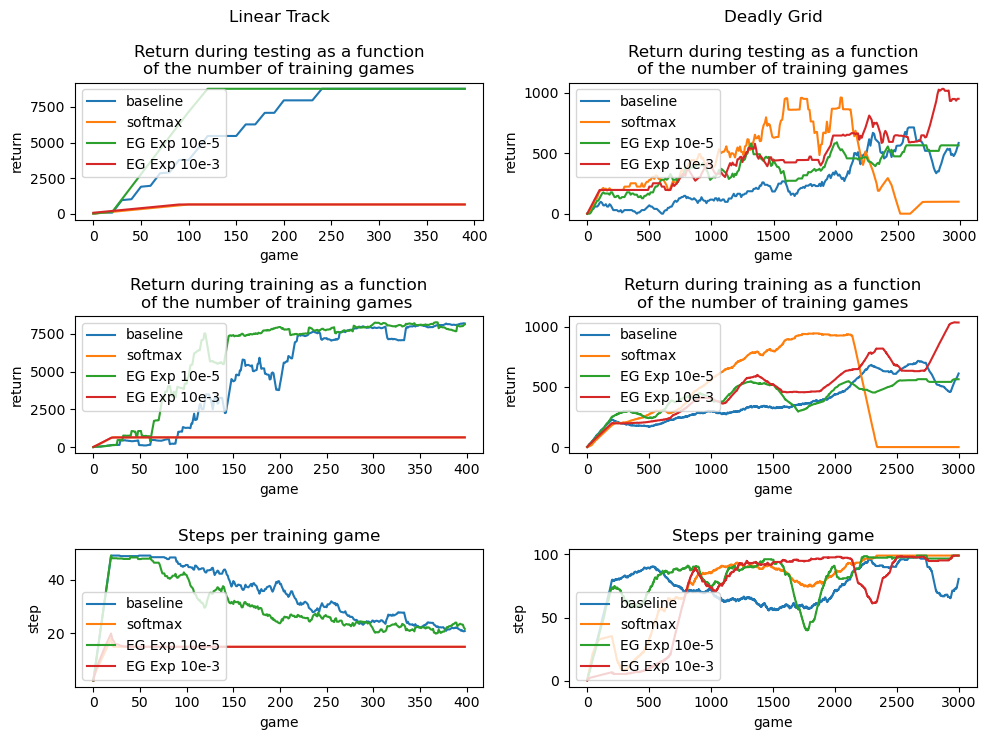

In [431]:
folder_linear = 'results_linear/exploration_results'
folder_grid = 'results_grid/exploration_results' 

fig, axs = plt.subplots(3, 2, figsize = (10, 7.5))

#baseline_results_linear
axs[0][0].plot([10 * i for i in range(int(baseline_results_linear["params"]['n_game']/10))],
               sliding_mean(baseline_results_linear["rewards_test"], 10)[:-9],
               label = f"baseline")
axs[1][0].plot(sliding_mean(baseline_results_linear["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = f"baseline")
axs[2][0].plot(sliding_mean(baseline_results_linear["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], 
               label = f"baseline")

axs[0][1].plot([10 * i for i in range(int(baseline_results_grid["params"]['n_game']/10))],
               sliding_mean(baseline_results_grid["rewards_test"], 10)[:-9],
               label = f"baseline")
axs[1][1].plot(sliding_mean(baseline_results_grid["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = f"baseline")
axs[2][1].plot(sliding_mean(baseline_results_grid["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G], 
               label = f"baseline")
#baseline_results_grid

freq = ["softmax", "eps-5", "eps-3"]
for f in freq:
    result = torch.load(f'{folder_linear}/results_{f}.pth')
    if f == "softmax":
        l = f"{f}"
    else:
        l = f"EG Exp 10e{f[-2:]}"
    axs[0][0].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = l)
    axs[1][0].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = l)
    axs[2][0].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], 
               label = l)
for f in freq:
    result = torch.load(f'{folder_grid}/results_{f}.pth')
    if f == "softmax":
        l = f"{f}"
    else:
        l = f"EG Exp 10e{f[-2:]}"
    axs[0][1].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = l)
    axs[1][1].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = l)
    axs[2][1].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G], 
                   label = l)

axs[0][0].legend(loc = 'upper left')
axs[0][0].set_title("Linear Track\n\nReturn during testing as a function\nof the number of training games")
axs[0][0].set_xlabel("game")
axs[0][0].set_ylabel("return")
axs[1][0].legend(loc = 'upper left')
axs[1][0].set_title("Return during training as a function\nof the number of training games ")
axs[1][0].set_xlabel("game")
axs[1][0].set_ylabel("return")
axs[2][0].set_title("Steps per training game")
axs[2][0].legend(loc = 'lower left')
axs[2][0].set_xlabel("game")
axs[2][0].set_ylabel("step")
axs[0][1].legend(loc = 'upper left')
axs[0][1].set_title("Deadly Grid\n\nReturn during testing as a function\nof the number of training games")
axs[0][1].set_xlabel("game")
axs[0][1].set_ylabel("return")
axs[1][1].legend(loc = 'upper left')
axs[1][1].set_title("Return during training as a function\nof the number of training games")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("return")
axs[2][1].legend(loc = 'lower left')
axs[2][1].set_title("Steps per training game")
axs[2][1].set_xlabel("game")
axs[2][1].set_ylabel("step")
plt.tight_layout()
plt.show()

# Learning rate / Batch size

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


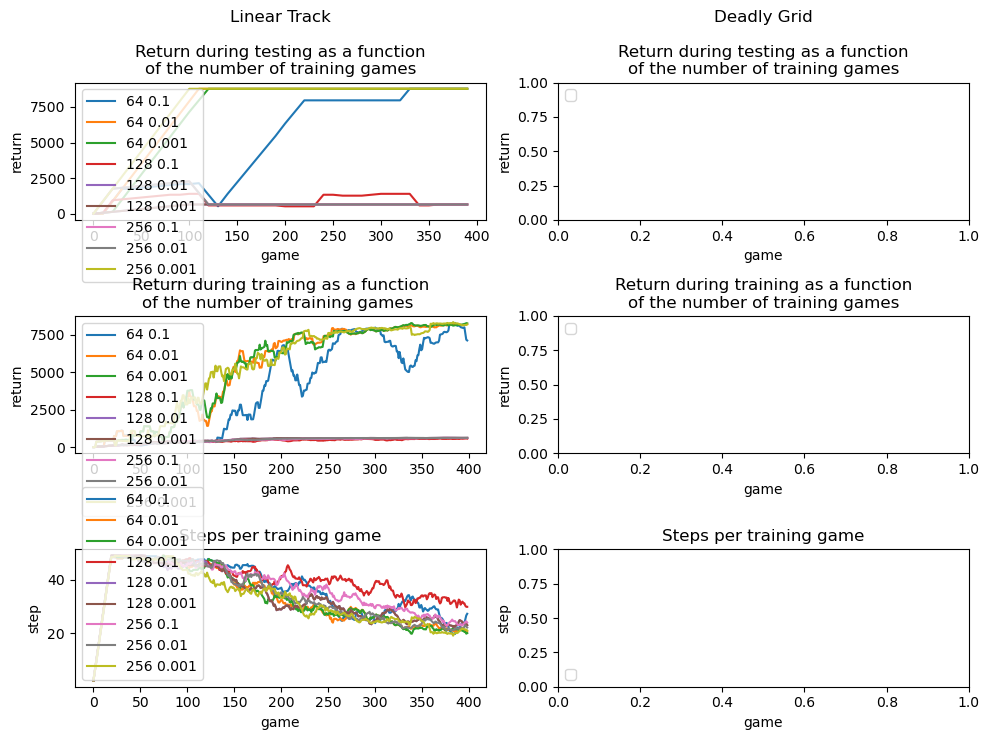

In [39]:
folder_linear = 'results_linear/replay_buffer_results'
folder_grid = 'results_grid/replay_buffer_results' 

fig, axs = plt.subplots(3, 2, figsize = (10, 7.5))

batch_sizes = [64, 128, 256]
learning_rates = [0.1, 0.01, 0.001]
for bs in batch_sizes:
    for lr in learning_rates:
        result = torch.load(f'{folder_linear}/results_{bs}_{lr}.pth')
        l = f"{bs} {lr}"
        axs[0][0].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = l)
        axs[1][0].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = l)
        axs[2][0].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], 
               label = l)

axs[0][0].legend(loc = 'upper left')
axs[0][0].set_title("Linear Track\n\nReturn during testing as a function\nof the number of training games")
axs[0][0].set_xlabel("game")
axs[0][0].set_ylabel("return")
axs[1][0].legend(loc = 'upper left')
axs[1][0].set_title("Return during training as a function\nof the number of training games ")
axs[1][0].set_xlabel("game")
axs[1][0].set_ylabel("return")
axs[2][0].set_title("Steps per training game")
axs[2][0].legend(loc = 'lower left')
axs[2][0].set_xlabel("game")
axs[2][0].set_ylabel("step")
axs[0][1].legend(loc = 'upper left')
axs[0][1].set_title("Deadly Grid\n\nReturn during testing as a function\nof the number of training games")
axs[0][1].set_xlabel("game")
axs[0][1].set_ylabel("return")
axs[1][1].legend(loc = 'upper left')
axs[1][1].set_title("Return during training as a function\nof the number of training games")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("return")
axs[2][1].legend(loc = 'lower left')
axs[2][1].set_title("Steps per training game")
axs[2][1].set_xlabel("game")
axs[2][1].set_ylabel("step")
plt.tight_layout()
plt.show()

# Capacity buffer

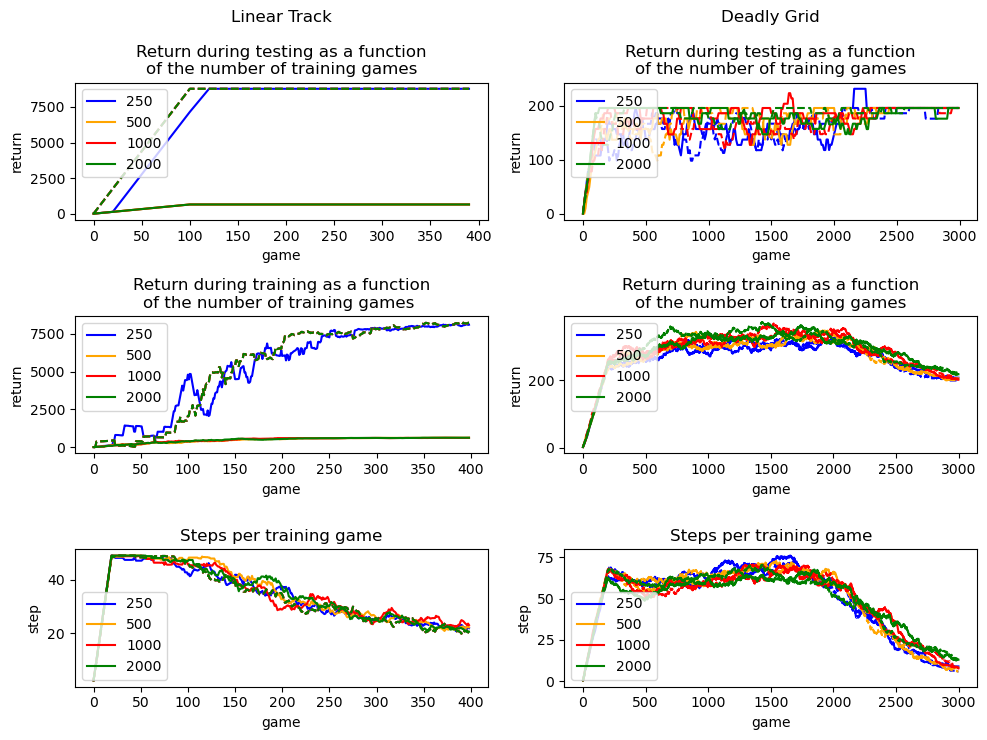

In [29]:
folder_linear = 'results_linear/prioritized_buffer_results'
folder_grid = 'results_grid/prioritized_buffer_results' 

color = ["blue", "orange", "red", "green"]
fig, axs = plt.subplots(3, 2, figsize = (10, 7.5))

#baseline_results_grid

cap = [250, 500, 1000, 2000]
for i, c in enumerate(cap):
    if c == 1000:
        result = rb_results_linear
    else : 
        result = torch.load(f'{folder_linear}/results_rb_{c}.pth')
    l = f"{c}"
    axs[0][0].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = l, color = color[i])
    axs[1][0].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               label = l, color = color[i])
    axs[2][0].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], 
               label = l, color = color[i])

    if c == 1000:
        result = prb_results_linear
    else : 
        result = torch.load(f'{folder_linear}/results_prb_{c}.pth')
    axs[0][0].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               '--', color = color[i])
    axs[1][0].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L],
               '--', color = color[i])
    axs[2][0].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_L)[:-SLIDING_WINDOW_L], 
               '--', color = color[i])

for i, c in enumerate(cap):
    if c == 1000:
        result = rb_results_grid
    else : 
        result = torch.load(f'{folder_grid}/results_rb_{c}.pth')
    l = f"{c}"
    axs[0][1].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               label = l, color = color[i])
    axs[1][1].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               label = l, color = color[i])
    axs[2][1].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G], 
               label = l, color = color[i])

    if c == 1000:
        result = prb_results_grid
    else : 
        result = torch.load(f'{folder_grid}/results_prb_{c}.pth')
        
    axs[0][1].plot([10 * i for i in range(int(result["params"]['n_game']/10))],
               sliding_mean(result["rewards_test"], 10)[:-9],
               '--', color = color[i])
    axs[1][1].plot(sliding_mean(result["rewards_train"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G],
               '--', color = color[i])
    axs[2][1].plot(sliding_mean(result["step_game"], SLIDING_WINDOW_G)[:-SLIDING_WINDOW_G], 
               '--', color = color[i])

axs[0][0].legend(loc = 'upper left')
axs[0][0].set_title("Linear Track\n\nReturn during testing as a function\nof the number of training games")
axs[0][0].set_xlabel("game")
axs[0][0].set_ylabel("return")
axs[1][0].legend(loc = 'upper left')
axs[1][0].set_title("Return during training as a function\nof the number of training games ")
axs[1][0].set_xlabel("game")
axs[1][0].set_ylabel("return")
axs[2][0].set_title("Steps per training game")
axs[2][0].legend(loc = 'lower left')
axs[2][0].set_xlabel("game")
axs[2][0].set_ylabel("step")
axs[0][1].legend(loc = 'upper left')
axs[0][1].set_title("Deadly Grid\n\nReturn during testing as a function\nof the number of training games")
axs[0][1].set_xlabel("game")
axs[0][1].set_ylabel("return")
axs[1][1].legend(loc = 'upper left')
axs[1][1].set_title("Return during training as a function\nof the number of training games")
axs[1][1].set_xlabel("game")
axs[1][1].set_ylabel("return")
axs[2][1].legend(loc = 'lower left')
axs[2][1].set_title("Steps per training game")
axs[2][1].set_xlabel("game")
axs[2][1].set_ylabel("step")
plt.tight_layout()
plt.show()

# Test model

In [ ]:
model.stat_dict()
state, obs_to_render = env.reset_with_render()
state = torch.tensor(state, dtype=torch.float32).flatten().to(device)
env.render(obs_to_render)
done = False
tot_rew_test = 0
with torch.no_grad():
        while not done:
            action = model.action(state, 0)
            state, rew , done, _, obs_to_render = env.step_with_render(action)
            state = torch.tensor(state, dtype=torch.float32).flatten().to(device)
            tot_rew_test += rew
            env.render(obs_to_render)
            display.display(plt.gcf())
            display.clear_output(wait=True)
print(tot_rew_test)